# Twitch Streamers Dataset Exploration
## by (Mohannad Mahmoud Hassan)

## Preliminary Wrangling

Context (provided by author at https://www.kaggle.com/aayushmishra1512/twitchdata)

Gaming is a very big industry now. Every year there are millions of Dollars invested in Esports and many new companies want to invest in the Esports scene now. One of bigegest ever deals was when Mixer opened up and brought Ninja and Shroud to their platform from twitch. But Twitch has been a home to streamers since day 1 and now that Mixer has been shut down, streamers are returning to the platform again.Millions, if not billions, watch twitch streams everyday and i myself like to watch twitch streams. So i put together Top 1000 Streamers from past one year who were streaming on twitch.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [173]:
df= pd.read_csv("twitchdata-update.csv")
df.head(2)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English


In [174]:
#Data info is viewed to determine quality of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [175]:
df.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [176]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [178]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.rename(columns=lambda x: x.strip().replace("(", "_"), inplace=True)
df.rename(columns=lambda x: x.strip().replace(")", ""), inplace=True)

# confirm changes
df.head(1)

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English


## Conclusion

> The Data Is extremely clean an minimum wrangling or cleanng is needed. Minor feature engineering can be performed during exploration to increase the readibility of some variables such as converting values in munites to hours or days.
Column names were cleaned to abide by conventions and prevent any syntax difficulties.


### What is the structure of your dataset?

> The Data contains observations for a 1000 Twich Streamers where 1 observation is a Streamer Channel with the data repoted being :[ Watch time(Minutes)	Stream time(minutes)	Peak viewers	Average viewers	Followers	Followers gained	Views gained	Partnered	Mature	Language]

### What is/are the main feature(s) of interest in your dataset?

> The main features of the data is that it contains key parameters that could be used to estimate streamer popularty or success. Some Important classifications are displayed as well such as whether<br>
- The content is mature or not and wheather. (bool)<br>
- Twitch has partnered with the streamers or not.(bool)


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Having multiple metrics to evaluate performance of Twitch channels will be vey helpful in drawing conlclusions about the characteristics of most succesful channels and if there is a relation between success and the fact of wheather the channel is partnered.<br>
The main question I want to ask are:<br>
Does the type of content affect streaming time?<br>
Does the Twitch Partnership affect popularity (i.e. Number of followers)<br>
How does the Twitch Partnership affect Average Viewers in different followed categories? (i.e. Number of followers)<br>
I expect there to be relation between Follower count and streaming time.

## Univariate Exploration
I will start by looking at the distribution of the variables of interest

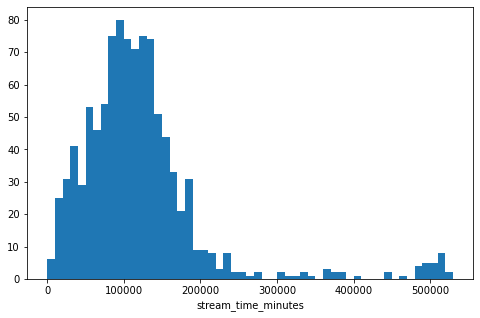

In [179]:
# start with a standard-scaled histogram
binsize = 10000
bins = np.arange(0, df.stream_time_minutes.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'stream_time_minutes',bins = bins);

plt.xlabel('stream_time_minutes');
plt.show()

The Stream Time in minutes shows a normal distribution regardless of the outliers

In [8]:
#Examine outliers to make sure they are from valid observations
df.query('stream_time_minutes > 500000')

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
49,BeyondTheSummit,1339097490,505080,116547,2635,923689,114948,42403593,True,False,English
232,JohnPitterTV,461605275,508965,4148,900,286184,211365,19054606,True,False,Portuguese
306,RocketBeansTV,360858030,518415,5223,696,416018,27024,5973152,True,False,German
392,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,True,False,English
397,SaltyBet,290991045,508140,3467,571,224099,69465,4509671,True,False,English
417,DownToQuest,281365035,513540,20723,543,82299,53724,3524088,True,True,English
433,livekiss,269518965,517260,7435,520,31323,2447,1641644,True,False,Chinese
469,SaltyTeemo,247613265,517980,1803,476,173196,36103,2117741,False,False,English


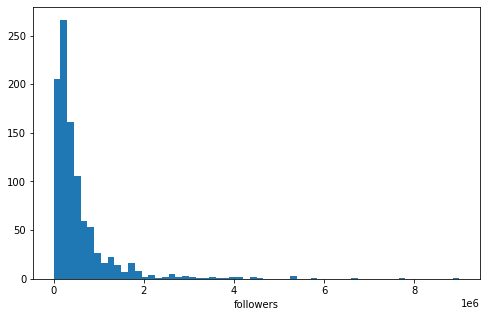

In [9]:
#Number of followers Histogram
binsize = 150000
bins = np.arange(0, df.followers.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'followers',bins = bins);

plt.xlabel('followers');
plt.show()

The followers histogram is heavily right skewed so a log transformation could be considered.

In [10]:
#Examine outliers to make sure they are from valid observations

df.query('followers > 4000000')

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
10,TimTheTatman,2834436990,108780,142067,25664,5265659,1244341,50119786,True,True,English
12,Riot Games (riotgames),2674646715,80820,639375,20960,4487489,497678,56855694,True,False,English
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish
23,DrDisrespect,1839882465,73065,97540,23794,4450718,825004,43919410,True,False,English
33,DrLupo,1517612010,172350,90696,8311,4115083,567795,47295386,True,False,English
35,Myth,1479214575,134760,122552,9396,6726893,1421811,37384058,True,False,English
87,dakotaz,978947160,132615,43397,7112,4520305,489250,18504106,True,False,English


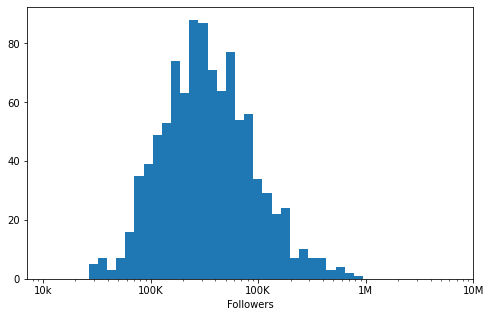

In [180]:
# followers distribution on log scale instead
log_binsize = 0.085
bins = 10 ** np.arange(4, np.log10(df.followers.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'followers', bins = bins)
plt.xscale('log')
plt.xticks([1e4, 1e5, 1e6, 1e7, 1e8], [ '10k', '100K', '100K', '1M', '10M'])
plt.xlabel('Followers')
plt.show()

The distribution is normal under log scale.

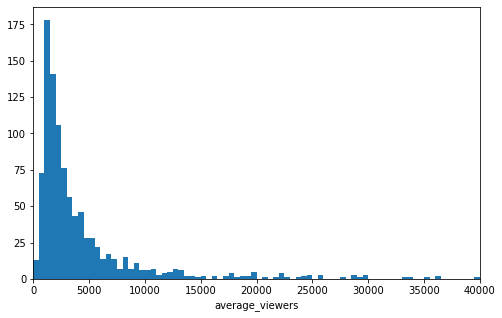

In [193]:
#average viewers histogram
binsize = 500
bins = np.arange(0, df.average_viewers.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'average_viewers',bins = bins);
plt.xlim(xmin=0, xmax = 40000)

plt.xlabel('average_viewers');
plt.show()

Equally right skewed compared to the previous histogram so a similar characteristic is present

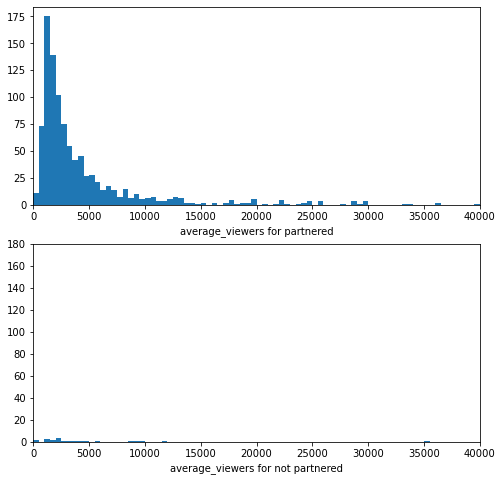

In [195]:
# let's plot histogram of partnered vs not partnered streamers to see of this has an effect on viewers 

fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
ax[0].hist(data = df.query('partnered == True'), x = 'average_viewers',bins = bins ,color = default_color);
ax[0].set_xlim([0, 40000])
ax[0].set_xlabel("average_viewers for partnered")


ax[1].hist(data = df.query('partnered == False'), x = 'average_viewers',bins = bins,color = default_color);
ax[1].set_xlim([0, 40000])
ax[1].set_ylim([0, 180])

ax[1].set_xlabel("average_viewers for not partnered")

plt.show()

The number of not partnered observations in the dataset is very small hence its not possible to draw any conclusions

978
22


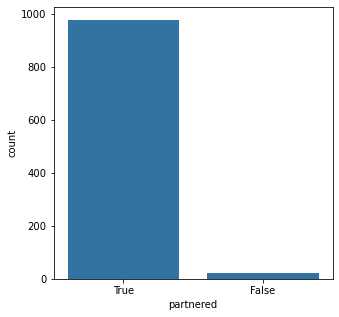

In [15]:
#Comparing count of observations based on the partenerd categorical variable
type_counts = df.partnered.value_counts()
type_order = type_counts.index

plt.figure(figsize=[5,5])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'partnered', color = default_color , order=type_order);
print(df.query('partnered == True').shape[0])
print(df.query('partnered == False').shape[0])

The ratio is huge as expected

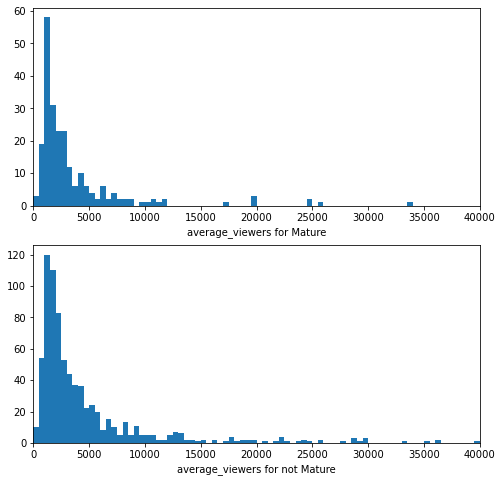

In [16]:

# let's plot histogram of Mature vs not Mature streamers to see of this has an effect on viewers 
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
ax[0].hist(data = df.query('mature == True'), x = 'average_viewers',bins = bins ,color = default_color);
ax[0].set_xlim([0, 40000])
ax[0].set_xlabel("average_viewers for Mature")

ax[1].hist(data = df.query('mature == False'), x = 'average_viewers',bins = bins,color = default_color);
ax[1].set_xlim([0, 40000])
ax[1].set_xlabel("average_viewers for not Mature")
plt.show()

Both distributions are similar

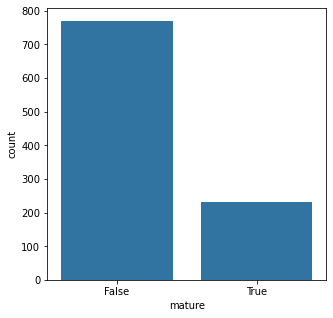

In [17]:
#Comparing count of observations based on the partenerd categorical variable

type_counts = df.mature.value_counts()
type_order = type_counts.index

plt.figure(figsize=[5,5])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'mature', color = default_color , order=type_order);

The count ratio is reasonable with far not non-mature streamers

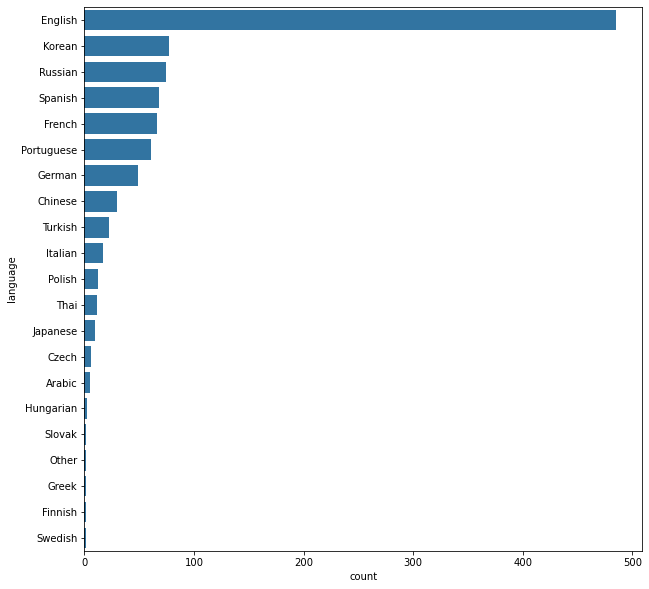

In [18]:
#Examine count of different languages
type_counts = df.language.value_counts()
type_order = type_counts.index

plt.figure(figsize=[10,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'language', color = default_color , order=type_order);

English is the most dominant language but other languages together form a similar proportions

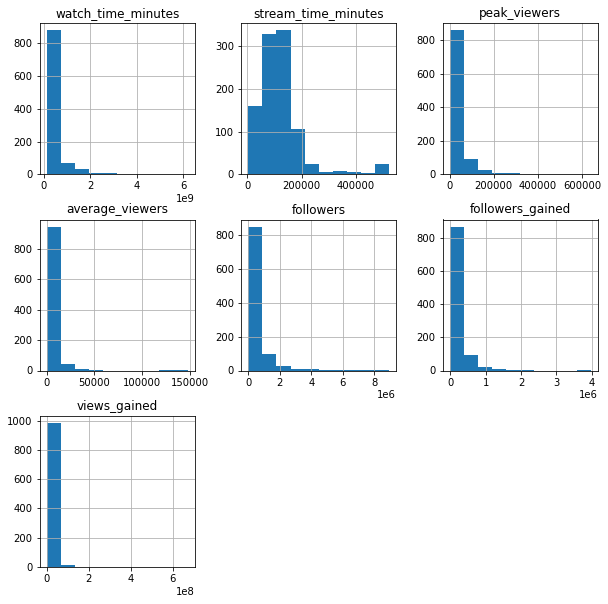

In [19]:
#plot a quick view of all histograms
df.hist(figsize=[10,10]);


> The histograms show that most variables are heavily right skewed 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most Distributions were right skewed in the standard scale. Log scaling was performed to view the data properly. The transformed data all had normal distribution under log scaling and this makes sene that the most popular channels are a few portion of the total

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some outliers made it very hard to examine the distributions so axis limits were imposed after examining the observations it seemed that the outliers are possible and no need for removing them. The ratio between the partnered and not partnered channels was very huge with only 22 not partnered observations making it hard to draw any useful conclusions.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [20]:
#Define lists of numerical and categorical variables to aid in plotting
numeric_vars = ['watch_time_minutes','stream_time_minutes','peak_viewers','average_viewers','followers','followers_gained','views_gained']
categoric_vars = ['partnered','mature','language']

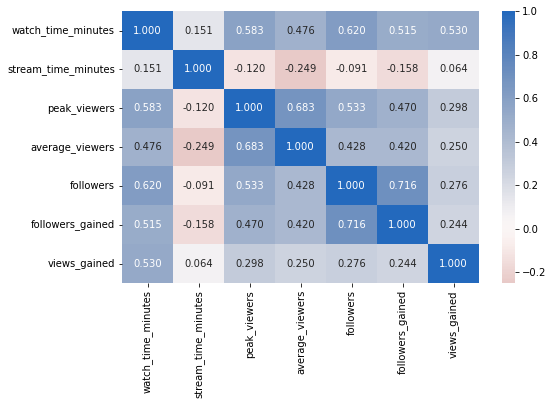

In [21]:
# correlation map plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Most of the variables have heavy correlations except for variables which are already dependant on each other such as [view and gained views] and [followers and gained followers] and these relations are of no interest

In [208]:
#Outliers Are removed to get clearer plots in scatter matrix
df2 = df.query('watch_time_minutes < 1000000000').query('peak_viewers<400000').query('average_viewers<15000').query('average_viewers < 50000').query('followers < 2600000').query('followers_gained<3000000').query('views_gained < 800000000').query('stream_time_minutes < 300000')

df2 = df2.reset_index()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                849 non-null    int64 
 1   channel              849 non-null    object
 2   watch_time_minutes   849 non-null    int64 
 3   stream_time_minutes  849 non-null    int64 
 4   peak_viewers         849 non-null    int64 
 5   average_viewers      849 non-null    int64 
 6   followers            849 non-null    int64 
 7   followers_gained     849 non-null    int64 
 8   views_gained         849 non-null    int64 
 9   partnered            849 non-null    bool  
 10  mature               849 non-null    bool  
 11  language             849 non-null    object
dtypes: bool(2), int64(8), object(2)
memory usage: 68.1+ KB


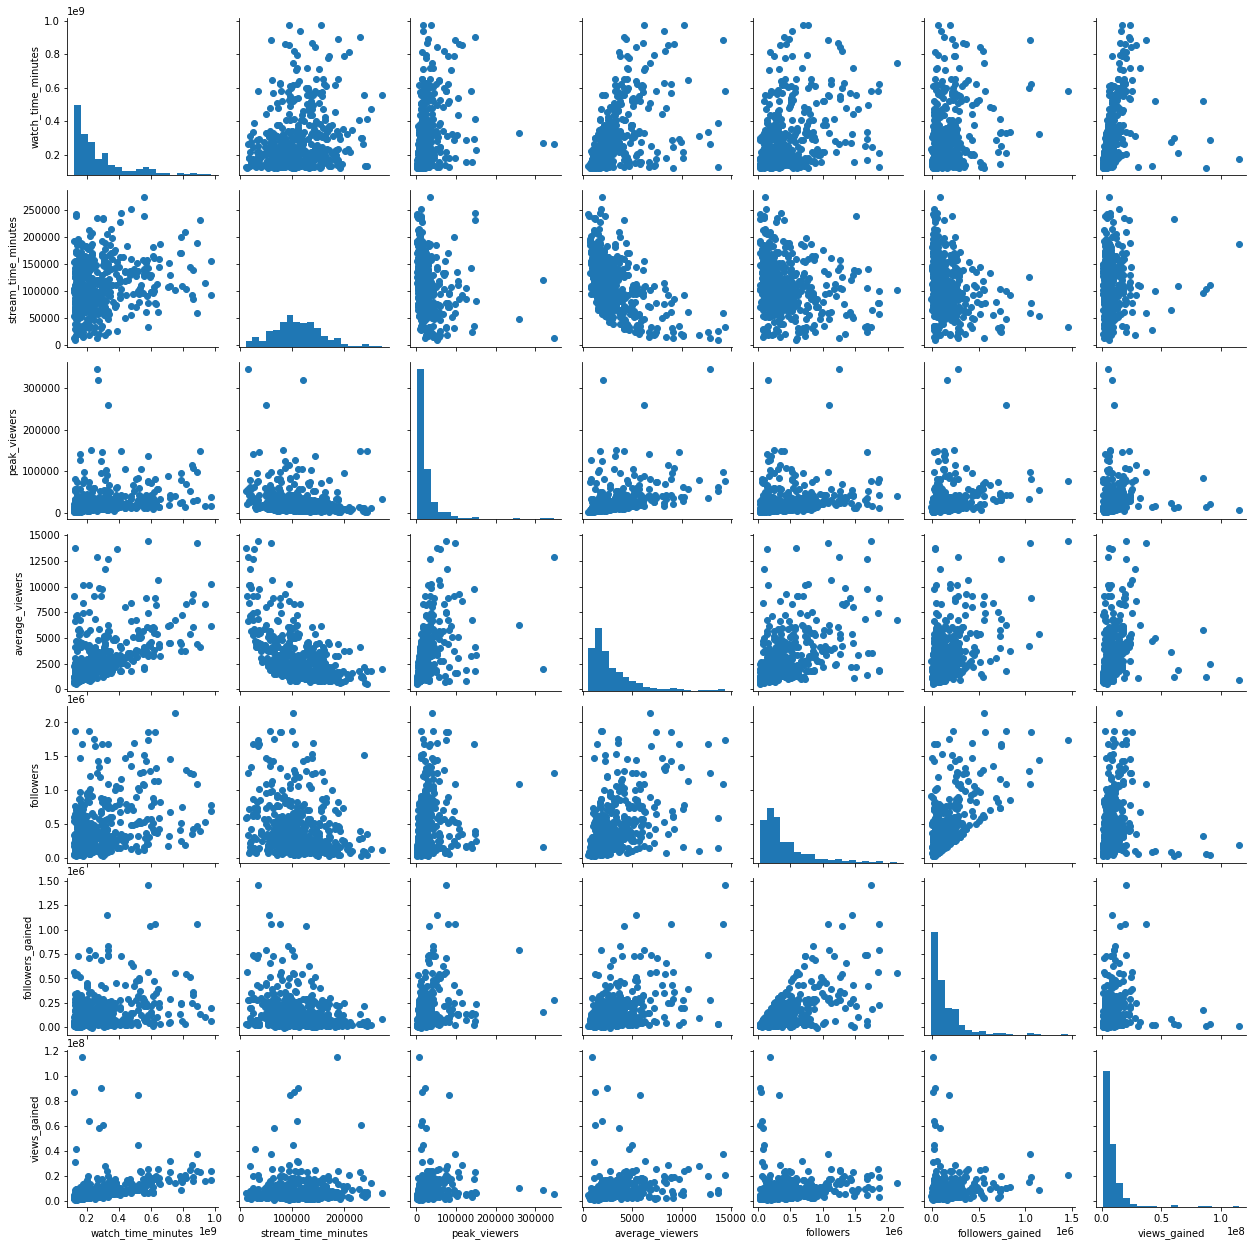

In [210]:

# plot matrix: sample 500 channels so that plots are clearer and
# they render faster
samples = np.random.choice(df2.shape[0], 500, replace = False)
df2_sample = df2.loc[samples,:]

g = sb.PairGrid(data = df2_sample, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Same conclusion from the previous figure except some week negative correlation is observed between streaming time and average viewers which will be further investigated. Most relationships are week positive correlations. Further investigation will be performed.

C:\Users\mohannad\Anaconda3\envs\Udacity_adv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohannad\Anaconda3\envs\Udacity_adv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohannad\Anaconda3\envs\Udacity_adv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

<Figure size 720x1440 with 0 Axes>

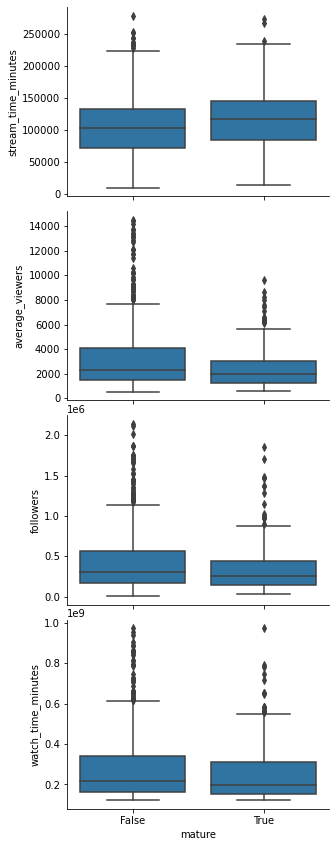

In [209]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [10, 20]);
g = sb.PairGrid(data = df2, y_vars = ['stream_time_minutes','average_viewers','followers','watch_time_minutes'], x_vars = ['mature'],
                height = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

Non mature content shows a higher value in watch time, followers and viewers although the streaming time is higher.

C:\Users\mohannad\Anaconda3\envs\Udacity_adv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohannad\Anaconda3\envs\Udacity_adv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohannad\Anaconda3\envs\Udacity_adv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

<Figure size 720x720 with 0 Axes>

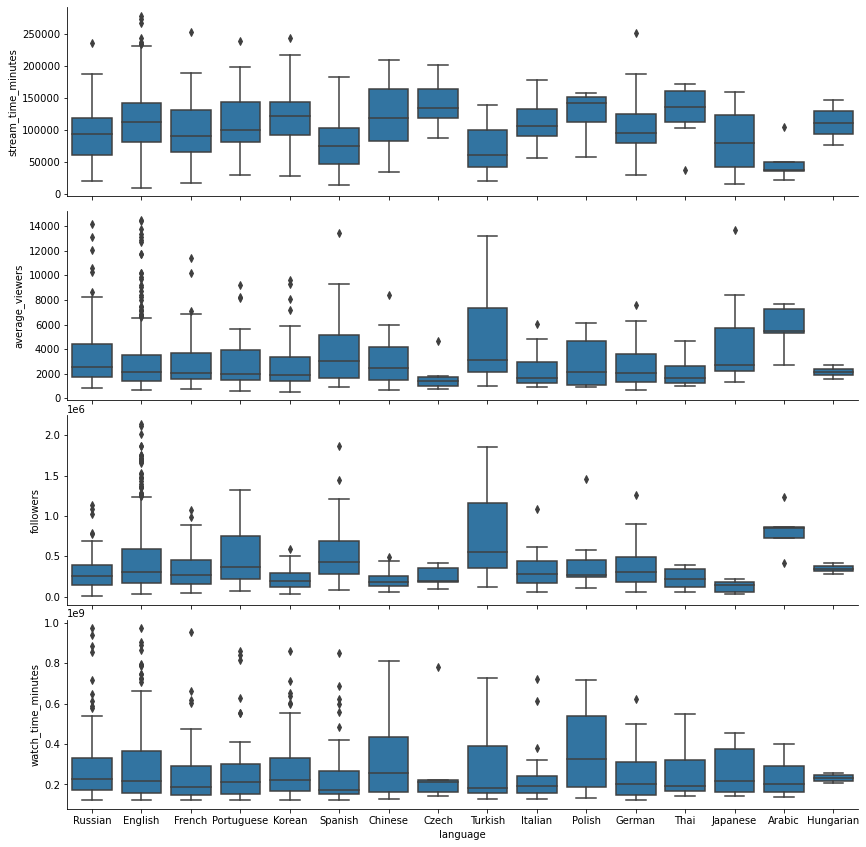

In [211]:
# plot matrix of numeric features of interest against across different languages

#Languages with low number of observations are dropped because they wont have meaningful plots.
df3 = df2.query('language != "Other" & language != "Slovak" & language != "Greek" & language != "Finnish"& language != "Swedish"')
def boxgrid(x, y, **kwargs):
    
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = df3, y_vars = ['stream_time_minutes','average_viewers','followers','watch_time_minutes'], x_vars = ['language'],
                height = 3, aspect = 4);
g.map(boxgrid);
plt.show();

Some trends can be observed in certain languages, I wonder weather the type of content affects these stats across languages.

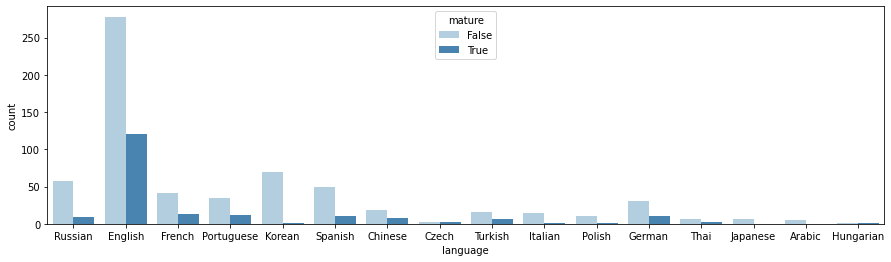

In [216]:
# Ratio of Mature to non mature content across different languages can be invetigated
plt.figure(figsize = [15,4])

# subplot 1: color vs cut
sb.countplot(data = df3, x = 'language', hue = 'mature', palette = 'Blues');


The larger number of English streamers is very obvious so its removed in the next plot to zoom on other ratios

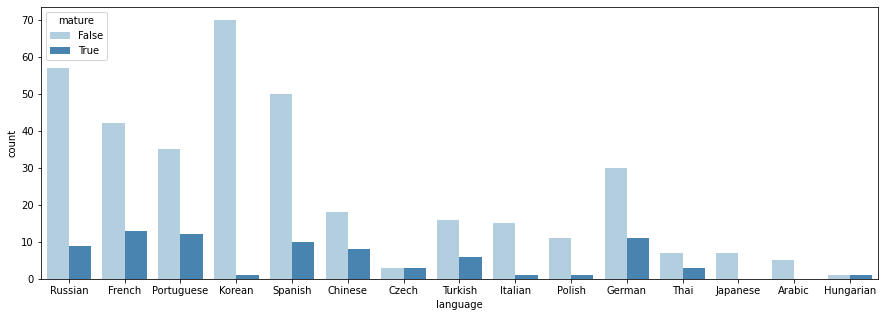

In [218]:
plt.figure(figsize = [15,5])
sb.countplot(data = df3.query('language != "English"'), x = 'language', hue = 'mature', palette = 'Blues');

French and German languages seem to have the highest ratio of Mature content, while arabic and japanese on the other hand has no mature content observations

Text(0, 0.5, 'followers')

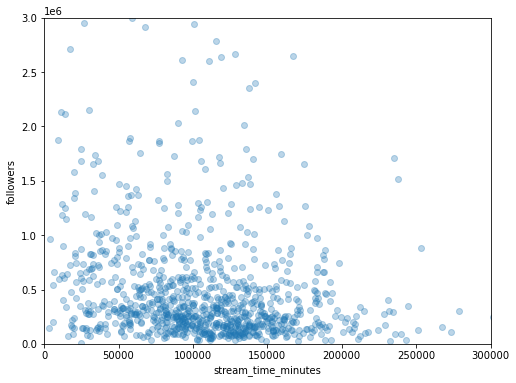

In [230]:
# scatter plot of followers vs. average viewers

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'stream_time_minutes', y = 'followers', alpha = 3/10 ,)
plt.xlim([0,300000])
plt.ylim([0,3000000])
plt.xlabel('stream_time_minutes')
plt.ylabel('followers')


No correlations can be observed

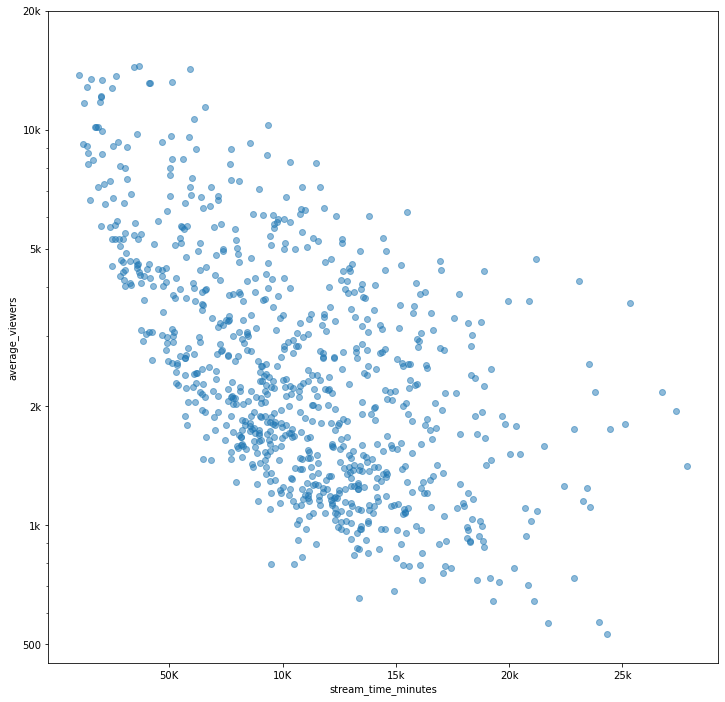

In [235]:
# scatter plot of followers vs. average viewers

plt.figure(figsize = [12,12])
plt.scatter(data = df2, x = 'stream_time_minutes', y = 'average_viewers', alpha = 5/10 )
plt.xlabel('stream_time_minutes')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xticks([5e4 , 10e4 ,15e4, 20e4 ,25e4 ], ['50K', '10K', '15k', '20k', '25k'])

plt.ylabel('average_viewers');


A negative correlation is  present between streaming time and average viewers number which I find to be interesting. Streaming more is more common among less-viewed channels

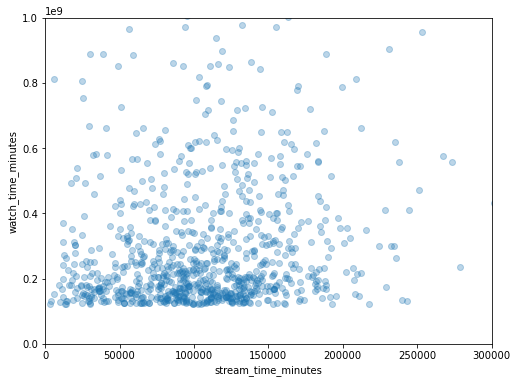

In [231]:
# scatter plot of stream_time_minutes vs. watch_time_minutes

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'stream_time_minutes', y = 'watch_time_minutes', alpha = 3/10 ,)
plt.xlim([0,300000])
plt.ylim([0,1000000000])
plt.xlabel('stream_time_minutes')
plt.ylabel('watch_time_minutes')
plt.show()

No correlations can be observed

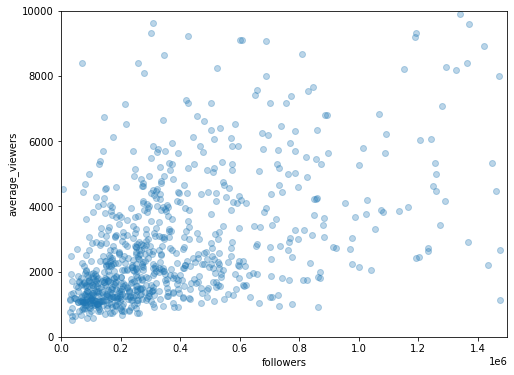

In [233]:
# scatter plot of followers vs. average viewers

plt.figure(figsize = [8, 6])
plt.scatter(data = df2, x = 'followers', y = 'average_viewers', alpha = 3/10 ,)
plt.ylim([0,10000])
plt.xlim([0,1500000])
plt.xlabel('followers')
plt.ylabel('average_viewers')
plt.show()

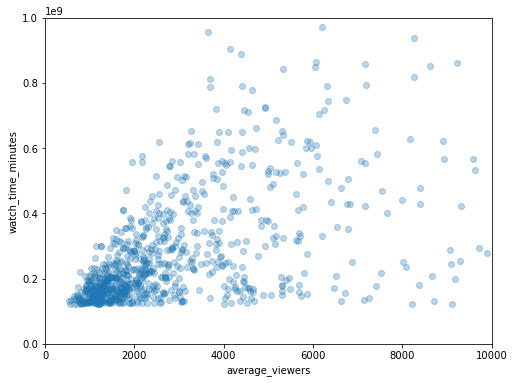

In [234]:
# scatter plot of average_viewers vs. watch_time_minutes 

plt.figure(figsize = [8, 6])
plt.scatter(data = df2, x = 'average_viewers', y = 'watch_time_minutes', alpha = 3/10 ,)
plt.xlim([0,10000])
plt.ylim([0,1000000000])
plt.xlabel('average_viewers')
plt.ylabel('watch_time_minutes')
plt.show()

A week positive correlation is observed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most correlations were weak and no obvious trends can be observed. The most interesting feature was the negative relationship between the streaming time and number of viewers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I wasn't expecting the language to have a great effect on distribution of features but it yielded interesting results when compared for ratios of mature content.

## Multivariate Exploration



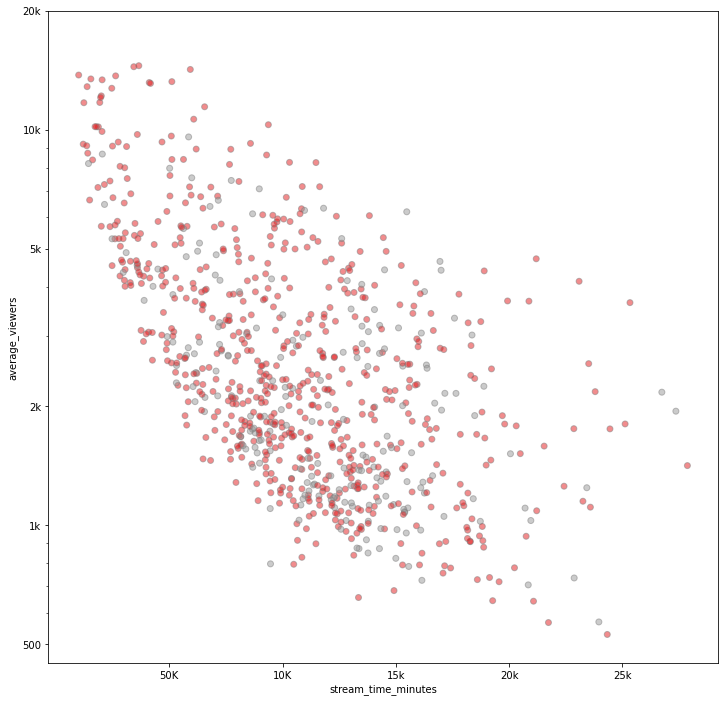

In [245]:
# scatter plot of followers vs. average viewers and colring based on type of content

plt.figure(figsize = [12,12])
plt.scatter(data = df2, x = 'stream_time_minutes', y = 'average_viewers', alpha = 5/10 , c = 'mature' ,cmap="Set1",edgecolors="grey")
plt.xlabel('stream_time_minutes')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xticks([5e4 , 10e4 ,15e4, 20e4 ,25e4 ], ['50K', '10K', '15k', '20k', '25k'])

plt.ylabel('average_viewers');


Both types of content show the same behavior

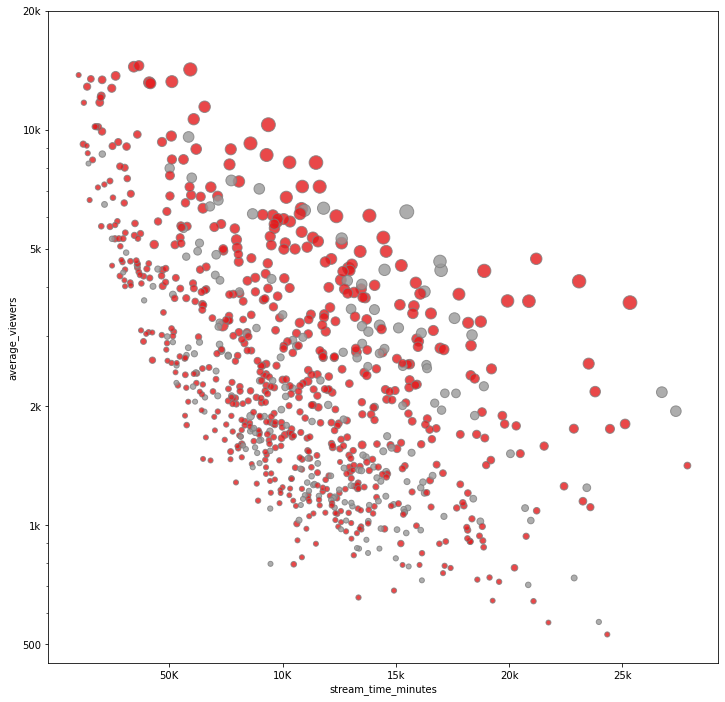

In [253]:
# scatter plot of followers vs. average viewers and colring based on type of content with marker sized by watch time in minutes
s = df2.watch_time_minutes/5000000
plt.figure(figsize = [12,12])
plt.scatter(data = df2, x = 'stream_time_minutes', y = 'average_viewers' , c = 'mature', s = s, cmap="Set1", alpha=0.8, edgecolors="grey")
plt.xlabel('stream_time_minutes')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xticks([5e4 , 10e4 ,15e4, 20e4 ,25e4 ], ['50K', '10K', '15k', '20k', '25k'])

plt.ylabel('average_viewers');

Average viewers shows positive correlation with watch time for the whole streaming time range

In [254]:
# Define a log transformation plot to use later in plots and compute the log of average viewers
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df3['log_vieweres'] = df3['average_viewers'].apply(log_trans)

C:\Users\mohannad\AppData\Local\Temp/ipykernel_5172/192302158.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['log_vieweres'] = df3['average_viewers'].apply(log_trans)


In [161]:
#define function to aid with plotting faceted heat maps
def hist2dgrid(x, y, **kwargs):
    
    palette = kwargs.pop('color')
    bins_x = np.arange(0,500000,500000/20)
    bins_y = np.arange(2.4, 5+0.1, 0.15)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.yticks(np.log10(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),  [500, '1k', '2k', '5k', '10k', '20k'])

C:\Users\mohannad\Anaconda3\envs\Udacity_adv1\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


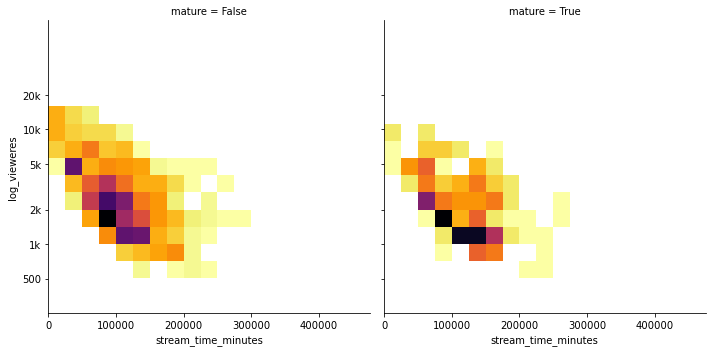

In [255]:
# create faceted heat maps on type of content

g = sb.FacetGrid(data = df3 , col = 'mature', col_wrap = 2, size = 5,
                 xlim = [0,500000+500000/20])
g.map(hist2dgrid, 'stream_time_minutes', 'log_vieweres', color = 'inferno_r')


plt.show()

Both types of content have similar modes that maintain similar stream time and number of viewers characteristics

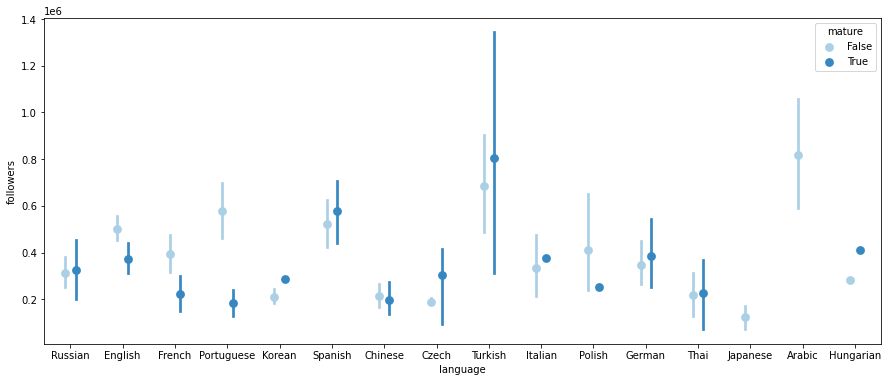

In [262]:
# A point plot for the number of followers across languages classified by type of content
fig = plt.figure(figsize = [15,6])
ax = sb.pointplot(data = df3, x = 'language', y = 'followers', hue = 'mature',
           palette = 'Blues', linestyles = '', dodge = 0.2)
plt.show();

Most languages exhibit higher number of followers for mature content except for chinese, english and polish or where no mature observations are included

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The data set was not the best to work with, I think a bigger data set that includes genre of streamed content, year of joining Twitch would help draw far more powerful conclusions. The partnered variable had no significance as mostly all channels were partnered. 

### Were there any interesting or surprising interactions between features?

> The most interesting interaction was between language and type of content as English however large its observations are still showed less number of views for mature content compared to others that had far more such as turkish.